### Google's Qiuck Draw Dataset, SVM Training and Analysis

In [2]:
import datetime
import os
from pathlib import Path
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

# sk-learn  :_)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# this is a quickdraw api that allows us to download our data
from quickdraw import QuickDrawDataGroup, QuickDrawData

## Using Quick Draw API

In [3]:
QuickDrawData().drawing_names

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball bat',
 'baseball',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'ceiling fan',
 'cell phone',
 'cello',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'cookie',
 'cooler',
 'couch',
 'cow',
 'crab',
 'crayon',
 'crocodile',
 'crow

## Downloading Quick Draw Dataset using API

In [4]:
IMAGE_SIZE = (28, 28) 
MAX_PER_CATEGORY = 800 # lol I have space limitations (used to be 1.3k)
DATASET_PATH = 'dataset/'
RECOGNIZED_ONLY = True

# using the quick draw data to download the images
for label in QuickDrawData().drawing_names:
    directory = Path(DATASET_PATH + label)
    png_files = list(directory.glob("*.png"))

    if not directory.exists():
        directory.mkdir(parents=True)
    else:
        # if folder is there but it doens't have all the files we need to check :P (I messed up here many times)
        if len(png_files) >= MAX_PER_CATEGORY:
            print(f"Skipping {label}, already has {len(png_files)} PNG files.")
            continue
        
        print(f"Processing {label}, found {len(png_files)} PNG files.")

    images = QuickDrawDataGroup(label, max_drawings=MAX_PER_CATEGORY, recognized=RECOGNIZED_ONLY)
    for img in images.drawings:
        filename = directory.as_posix() + "/" + str(img.key_id) + ".png"
        
        # lets check if we already have that file
        if filename.split("/")[:-1] in png_files:
            continue 
        
        # I need to resize the image to use it for our CNN Model
        img.get_image(stroke_width=3).resize(IMAGE_SIZE).save(filename)


Skipping aircraft carrier, already has 800 PNG files.
Skipping airplane, already has 800 PNG files.
Skipping alarm clock, already has 800 PNG files.
Skipping ambulance, already has 800 PNG files.
Skipping angel, already has 800 PNG files.
Skipping animal migration, already has 800 PNG files.
Skipping ant, already has 800 PNG files.
Skipping anvil, already has 800 PNG files.
Skipping apple, already has 800 PNG files.
Skipping arm, already has 800 PNG files.
Skipping asparagus, already has 800 PNG files.
Skipping axe, already has 800 PNG files.
Skipping backpack, already has 800 PNG files.
Skipping banana, already has 800 PNG files.
Skipping bandage, already has 800 PNG files.
Skipping barn, already has 800 PNG files.
Skipping baseball bat, already has 800 PNG files.
Skipping baseball, already has 800 PNG files.
Skipping basket, already has 800 PNG files.
Skipping basketball, already has 800 PNG files.
Skipping bat, already has 800 PNG files.
Skipping bathtub, already has 800 PNG files.


## Analysis Transformed Images

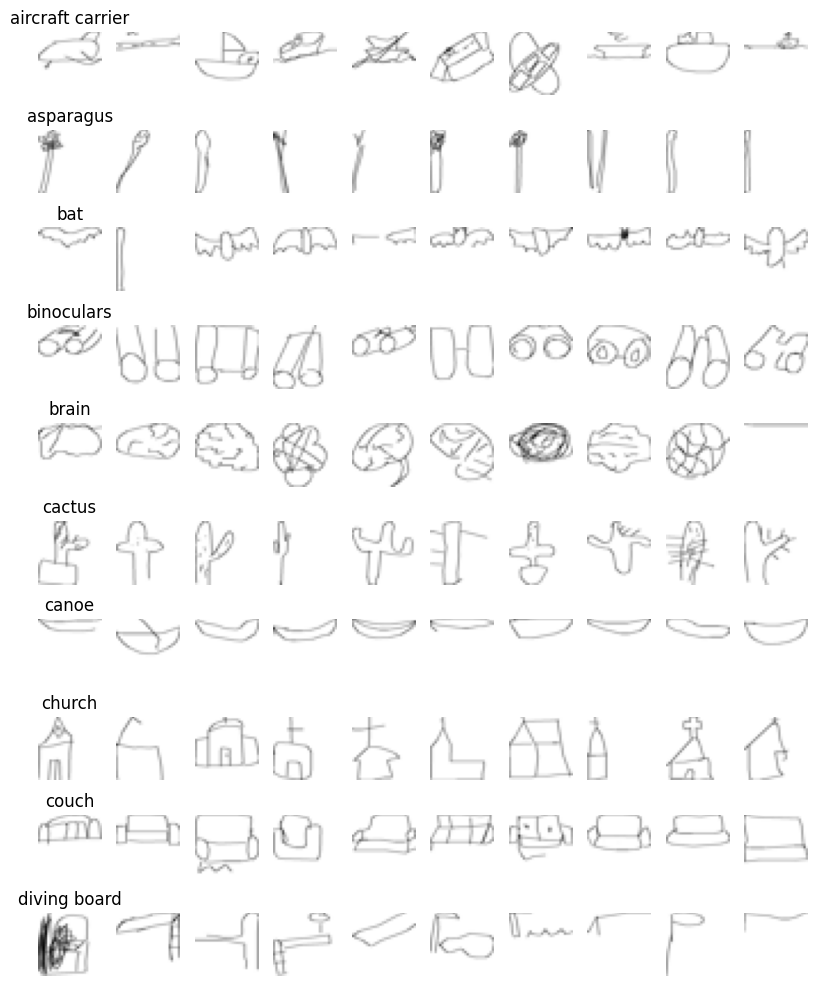

In [5]:
# lets take a look at the images
def display_sample_images(data_path, categories, num_images=10):
    fig, axes = plt.subplots(len(categories), num_images, figsize=(8, len(categories)))
    for i, category in enumerate(categories):
        category_path = Path(data_path) / category
        image_files = list(category_path.glob("*.png"))[:num_images]
        for j, image_file in enumerate(image_files):
            img = plt.imread(image_file)
            ax = axes[i, j] if len(categories) > 1 else axes[j]
            ax.imshow(img, cmap='gray')
            ax.axis('off')
            ax.set_title(category if j == 0 else "")
    plt.tight_layout()
    plt.show()

# we only want to see 10 categories
display_sample_images(DATASET_PATH, QuickDrawData().drawing_names[:100:10])

## Loading Quick Draw Dataset

In [6]:
def load_data(data_path):
    labels = []
    data = []
    
    
    for category in os.listdir(data_path):
        category_path = os.path.join(data_path, category)
        if not os.path.isdir(category_path):
            continue
        for image_file in Path(category_path).glob("*.png"):
            image = Image.open(image_file).convert('L')  # Convert to grayscale
            image = image.resize(IMAGE_SIZE)
            data.append(np.array(image).flatten())  # Flatten to 1D array
            labels.append(category)
    
    return np.array(data), np.array(labels)

In [7]:
# lets load the data and return the x and y
print("Loading data...")
X, y = load_data(DATASET_PATH)
print("Done loading! ")

# split up the data for train we have the training and the testing
print("Splitting update ... ")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Done Splitting!")

Loading data...
Done loading! 
Splitting update ... 
Done Splitting!


## Training SVM Model

In [8]:
# this is where we train the SVM model!
print("Setting up model ... ")
svm_model = SVC(kernel='linear', C=1.0)
print("Done setting up model!")

print("Training SVM...")
svm_model.fit(X_train, y_train)
print("Done training!")

Setting up model ... 
Done setting up model!
Training SVM...
Done training!


## SVM Model Evaluation

In [9]:
print("Evaluating SVM...")
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Evaluating SVM...
                         precision    recall  f1-score   support

       The Eiffel Tower       0.33      0.61      0.43       158
The Great Wall of China       0.08      0.05      0.06       162
          The Mona Lisa       0.20      0.32      0.24       161
       aircraft carrier       0.06      0.03      0.04       157
               airplane       0.21      0.21      0.21       189
            alarm clock       0.18      0.15      0.16       166
              ambulance       0.11      0.10      0.10       148
                  angel       0.21      0.18      0.19       170
       animal migration       0.11      0.10      0.11       164
                    ant       0.03      0.02      0.03       130
                  anvil       0.28      0.31      0.29       164
                  apple       0.38      0.68      0.49       145
                    arm       0.05      0.05      0.05       152
              asparagus       0.23      0.27      0.25       150
      

## Confusion Matrix

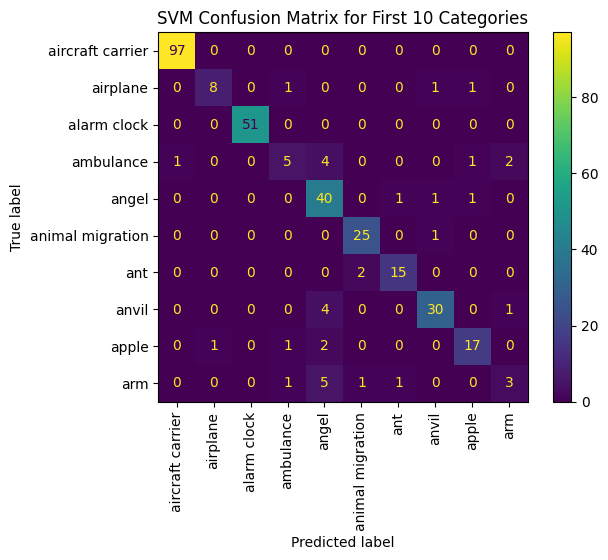

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

categories_to_display = 10
cm_subset = cm[:categories_to_display, :categories_to_display]

disp = ConfusionMatrixDisplay(confusion_matrix=cm_subset, display_labels=[QuickDrawData().drawing_names[i] for i in range(categories_to_display)])
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title(f"SVM Confusion Matrix for First {categories_to_display} Categories")
plt.show()